In [28]:
import pandas as pd

# Replace with the actual path to your CSV file in Google Drive
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Documents\\personal-development\\DS-ML\\stephen Ayeloja\\Train_data.csv")

# Display the first 5 rows of the DataFrame
display(df.head())

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [29]:
df.shape

(7160, 14)

In [30]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [31]:
round((df.isnull().sum() / df.shape[0]) * 100, 2)

Customer Id           0.00
YearOfObservation     0.00
Insured_Period        0.00
Residential           0.00
Building_Painted      0.00
Building_Fenced       0.00
Garden                0.10
Settlement            0.00
Building Dimension    1.48
Building_Type         0.00
Date_of_Occupancy     7.09
NumberOfWindows       0.00
Geo_Code              1.42
Claim                 0.00
dtype: float64

Handling Missing Values
Some features have missing values which needs to be filled, I'll fill them with the following method:

Garden: I'll impute with the mode as it's a categorical column with very few missing values and data is heavily skewed.
Building Dimension: I'll impute with the median, as it's a numerical column and median is robust to outliers.
Date_of_Occupancy: I'll impute with the median. Although it represents a year, treating it as numerical for median imputation is reasonable.
Geo_Code: I'll impute with a constant string 'Unknown' as it's a categorical identifier of location and the missingness might be informative. Inputing with anything else might affect the result.

In [32]:
# To impute 'Garden' with its mode
mode_garden = df['Garden'].mode()[0]
df['Garden'].fillna(mode_garden, inplace=True)

# to impute 'Building Dimension' with its median
median_building_dimension = df['Building Dimension'].median()
df['Building Dimension'].fillna(median_building_dimension, inplace=True)

# to impute 'Date_of_Occupancy' with its median
median_date_of_occupancy = df['Date_of_Occupancy'].median()
df['Date_of_Occupancy'].fillna(median_date_of_occupancy, inplace=True)

# to impute 'Geo_Code' with 'Unknown'
df['Geo_Code'].fillna('Unknown', inplace=True)

print("Missing values after imputation:")
print(round((df.isnull().sum() / df.shape[0]) * 100, 2))

Missing values after imputation:
Customer Id           0.0
YearOfObservation     0.0
Insured_Period        0.0
Residential           0.0
Building_Painted      0.0
Building_Fenced       0.0
Garden                0.0
Settlement            0.0
Building Dimension    0.0
Building_Type         0.0
Date_of_Occupancy     0.0
NumberOfWindows       0.0
Geo_Code              0.0
Claim                 0.0
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_10012\4169694434.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Garden'].fillna(mode_garden, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10012\4169694434.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [33]:

# identify collumn data types
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)
df[cat_col].nunique()

Categorical columns: ['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']
Numerical columns: ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim']


Customer Id         7160
Building_Painted       2
Building_Fenced        2
Garden                 2
Settlement             2
NumberOfWindows       11
Geo_Code            1308
dtype: int64

Data Type Conversion and Inspection
The NumberOfWindows column calls for concern, as it's currently an object type but is supposed to represents a numerical count.

In [34]:
# Convert NumberOfWindows to numeric, handling any non-numeric values
df['NumberOfWindows'] = pd.to_numeric(df['NumberOfWindows'], errors='coerce')

# Impute any NaN values in NumberOfWindows with the median
median_num_windows = df['NumberOfWindows'].median()
df['NumberOfWindows'].fillna(median_num_windows, inplace=True)

# Verify the conversion
print("NumberOfWindows dtype after conversion:", df['NumberOfWindows'].dtype)
print("NumberOfWindows unique values:", df['NumberOfWindows'].unique())

NumberOfWindows dtype after conversion: float64
NumberOfWindows unique values: [4. 3. 2. 5. 6. 7. 9. 8. 1.]


C:\Users\HP\AppData\Local\Temp\ipykernel_10012\1626528711.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfWindows'].fillna(median_num_windows, inplace=True)


In [35]:
# 1. To apply Frequency Encoding to 'Geo_Code'
# Calculate the frequency of each Geo_Code
geo_code_frequency = df['Geo_Code'].value_counts(normalize=True)

# Map the frequencies back to the Geo_Code column
df['Geo_Code_Frequency'] = df['Geo_Code'].map(geo_code_frequency)

# Drop the original 'Geo_Code' column
df.drop('Geo_Code', axis=1, inplace=True)

# 2. Apply One-Hot Encoding to other lower-cardinality categorical features
categorical_cols_to_onehot = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']
df = pd.get_dummies(df, columns=categorical_cols_to_onehot, drop_first=True)

print("\nDataFrame head after mixed encoding:")
display(df.head())

print("\nDataFrame info after mixed encoding:")
df.info()

print("\nNew DataFrame shape:", df.shape)


DataFrame head after mixed encoding:


,Customer Id,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,Geo_Code_Frequency,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U
0,H14663,2013,1.0,0,290.0,1,1960.0,4.0,0,0.000698,False,True,True,True
1,H2037,2015,1.0,0,490.0,1,1850.0,4.0,0,0.000698,True,False,False,False
2,H3802,2014,1.0,0,595.0,1,1960.0,4.0,0,0.000698,False,True,True,True
3,H3834,2013,1.0,0,2840.0,1,1960.0,4.0,0,0.000698,True,True,True,True
4,H5053,2014,1.0,0,680.0,1,1800.0,3.0,0,0.000698,True,False,False,False



DataFrame info after mixed encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building Dimension  7160 non-null   float64
 5   Building_Type       7160 non-null   int64  
 6   Date_of_Occupancy   7160 non-null   float64
 7   NumberOfWindows     7160 non-null   float64
 8   Claim               7160 non-null   int64  
 9   Geo_Code_Frequency  7160 non-null   float64
 10  Building_Painted_V  7160 non-null   bool   
 11  Building_Fenced_V   7160 non-null   bool   
 12  Garden_V            7160 non-null   bool   
 13  Settlement_U        7160 non-null   bool   
dtypes: bool(4), float64(5), int64(4), object(1)
memory usage: 587.5+ K

In [36]:
#statistical summary of dataset
df.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,Geo_Code_Frequency
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1871.873184,2.186034,1964.849721,4.111453,0.228212,0.004380
std,1.383769,0.239756,0.460629,2263.296186,0.940632,34.730347,1.165521,0.419709,0.004926
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,1.000000,0.000000,0.000140
25%,2012.000000,0.997268,0.000000,531.500000,2.000000,1960.000000,4.000000,0.000000,0.000698
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,4.000000,0.000000,0.002514
75%,2015.000000,1.000000,1.000000,2250.000000,3.000000,1980.000000,4.000000,0.000000,0.006425
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,9.000000,1.000000,0.019972


This table gives us a quick overview of the central tendency, dispersion, and shape of the distribution of each numerical column, as well as identifying potential outliers. Here's a column-by-column breakdown:

YearOfObservation:count: 7160 (all non-null entries) 
Insured_Period:count: 7160 mean: Approximately 0.91 std: 0.24 min: 0.0, max: 1.0 This represents the proportion of the year the property was insured. The mean being close to 1.0 suggests most properties were insured for a full period. The minimum being 0.0 and maximum 1.0 confirms it's a proportion. 
Residential: This appears to be a binary (0 or 1) indicator. A mean of 0.31 suggests about 31% of the properties are residential, while the remaining 69% are not. 
Building Dimension: There's a wide range in building dimensions, from 1 to 20940. The standard deviation is quite high, indicating significant variability. The mean (1871.87) is considerably higher than the median (50% mark: 1083.0), suggesting the presence of some very large buildings (right-skewed distribution). 
Building_Type: This is likely a categorical feature represented as numbers (1, 2, 3, 4). The mean and standard deviation give us some idea of the distribution across these types. 
Date_of_Occupancy: This column represents the year of occupancy. The data ranges from a very old building (1545) to a very recent one (2016). The average occupancy year is around 1965. 
NumberOfWindows: Most buildings have around 4 windows. The maximum is 9, indicating no buildings with an exceptionally high number of windows (after imputation logic). The median is also 4, suggesting a relatively symmetrical distribution. 
Claim:This is your target variable and appears to be binary (0 for no claim, 1 for a claim). A mean of 0.23 indicates that about 23% of the entries resulted in a claim, while 77% did not. This shows an imbalanced dataset, which is a common challenge in classification problems and with model selection. 
Geo_Code_Frequency: This is the frequency-encoded representation of the original Geo_Code. The values represent the proportion of each Geo_Code in the dataset. The low mean and small maximum value reflect that many Geo_Code values are unique or appear infrequently.

Class Imbalance: The Claim column shows a clear imbalance (23% claims vs. 77% no claims). 

In [37]:
# generate profiling report
from ydata_profiling import ProfileReport
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 43.46it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
#correlation analysis
df.corr(numeric_only=True)

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,Geo_Code_Frequency,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U
YearOfObservation,1.000000,0.025434,-0.040391,0.010959,0.005490,-0.030230,0.013225,-0.016367,-0.017736,0.056881,-0.120373,-0.120238,-0.120103
Insured_Period,0.025434,1.000000,-0.037620,0.008822,-0.017811,-0.010523,0.006691,0.088715,-0.038107,-0.037077,-0.047091,-0.047196,-0.046504
Residential,-0.040391,-0.037620,1.000000,0.056357,0.334039,-0.036885,0.131718,0.063509,0.025907,-0.032927,-0.082448,-0.082263,-0.082684
Building Dimension,0.010959,0.008822,0.056357,1.000000,0.009184,0.196190,0.280967,0.295558,-0.047864,0.089176,-0.136512,-0.136466,-0.136369
Building_Type,0.005490,-0.017811,0.334039,0.009184,1.000000,-0.137001,0.210553,0.112168,0.336342,-0.048541,-0.020430,-0.020375,-0.020320
Date_of_Occupancy,-0.030230,-0.010523,-0.036885,0.196190,-0.137001,1.000000,-0.050941,0.017781,-0.135780,-0.094140,0.175703,0.175622,0.175581
NumberOfWindows,0.013225,0.006691,0.131718,0.280967,0.210553,-0.050941,1.000000,0.172153,0.132732,0.051083,-0.094886,-0.094860,-0.094833
Claim,-0.016367,0.088715,0.063509,0.295558,0.112168,0.017781,0.172153,1.000000,0.034749,0.029857,-0.051657,-0.052171,-0.052019
Geo_Code_Frequency,-0.017736,-0.038107,0.025907,-0.047864,0.336342,-0.135780,0.132732,0.034749,1.000000,-0.000003,0.058412,0.058439,0.058671
Building_Painted_V,0.056881,-0.037077,-0.032927,0.089176,-0.048541,-0.094140,0.051083,0.029857,-0.000003,1.000000,-0.574757,-0.574919,-0.575081


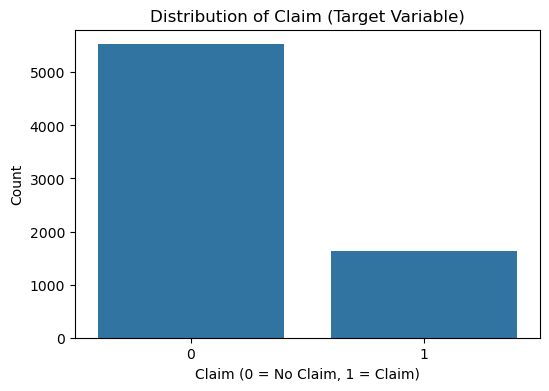

In [39]:
#Generate a count plot to visualize the distribution of the target variable Claim to confirm class balance or imbalance
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Create a count plot for the 'Claim' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Claim', data=df)
plt.title('Distribution of Claim (Target Variable)')
plt.xlabel('Claim (0 = No Claim, 1 = Claim)')
plt.ylabel('Count')
plt.show()

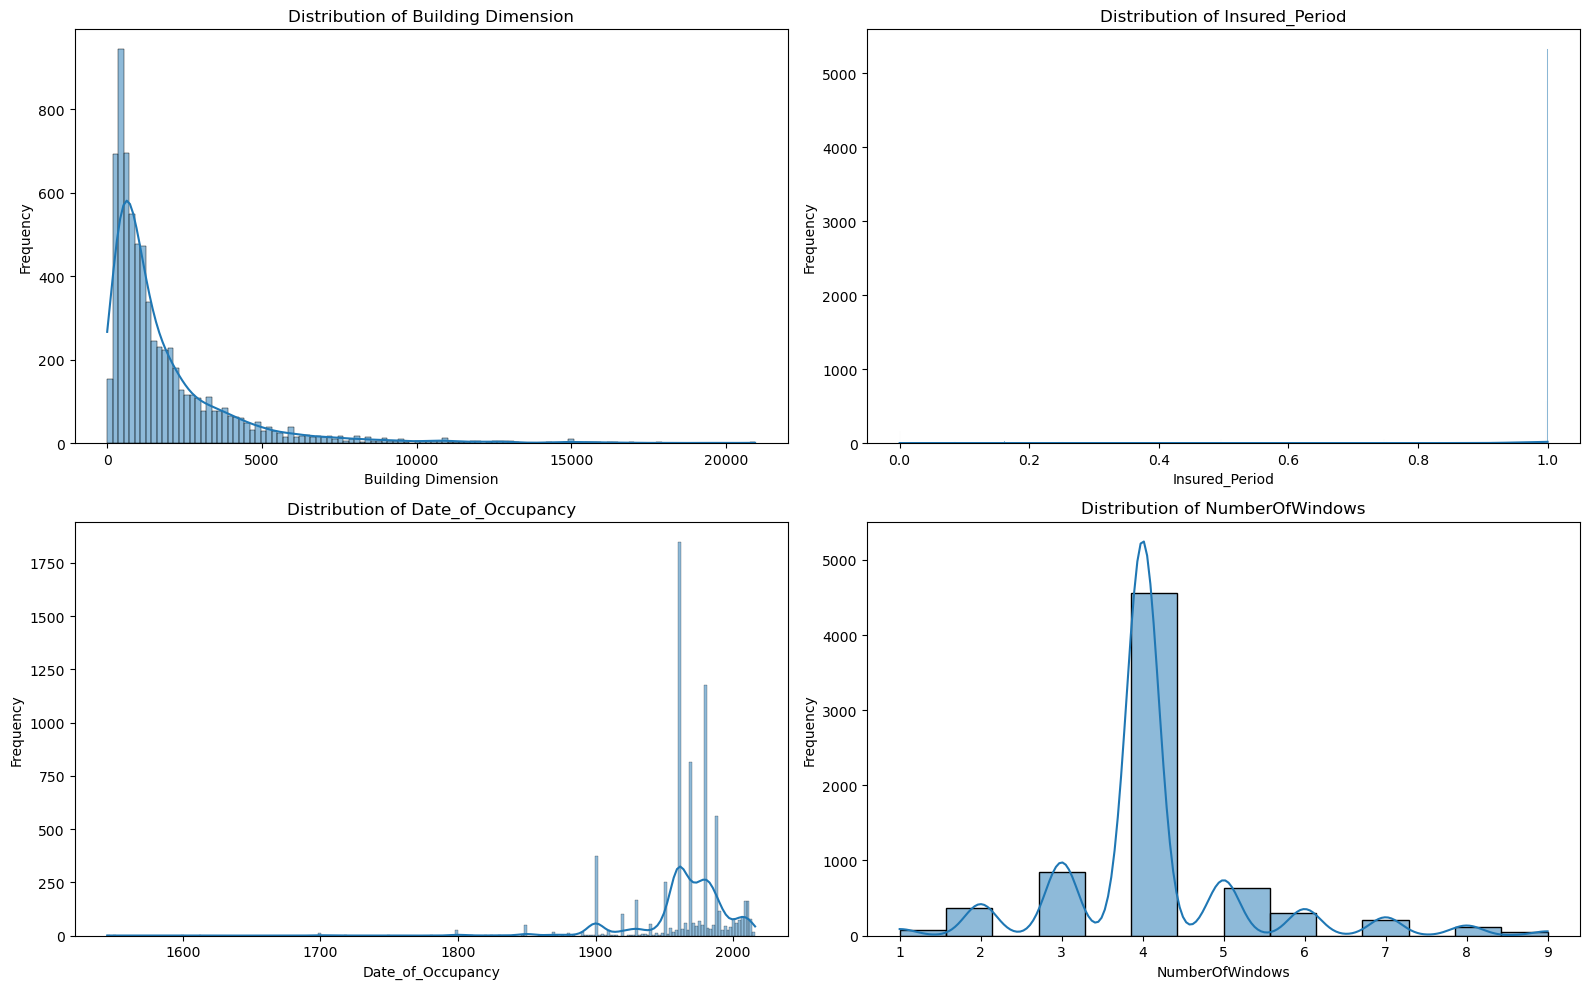

In [40]:
#Generate histograms for key numerical features: Building Dimension, Insured_Period, Date_of_Occupancy, and NumberOfWindows to understand their distributions
numerical_features = ['Building Dimension', 'Insured_Period', 'Date_of_Occupancy', 'NumberOfWindows']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1) # Create a 2x2 grid of subplots
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

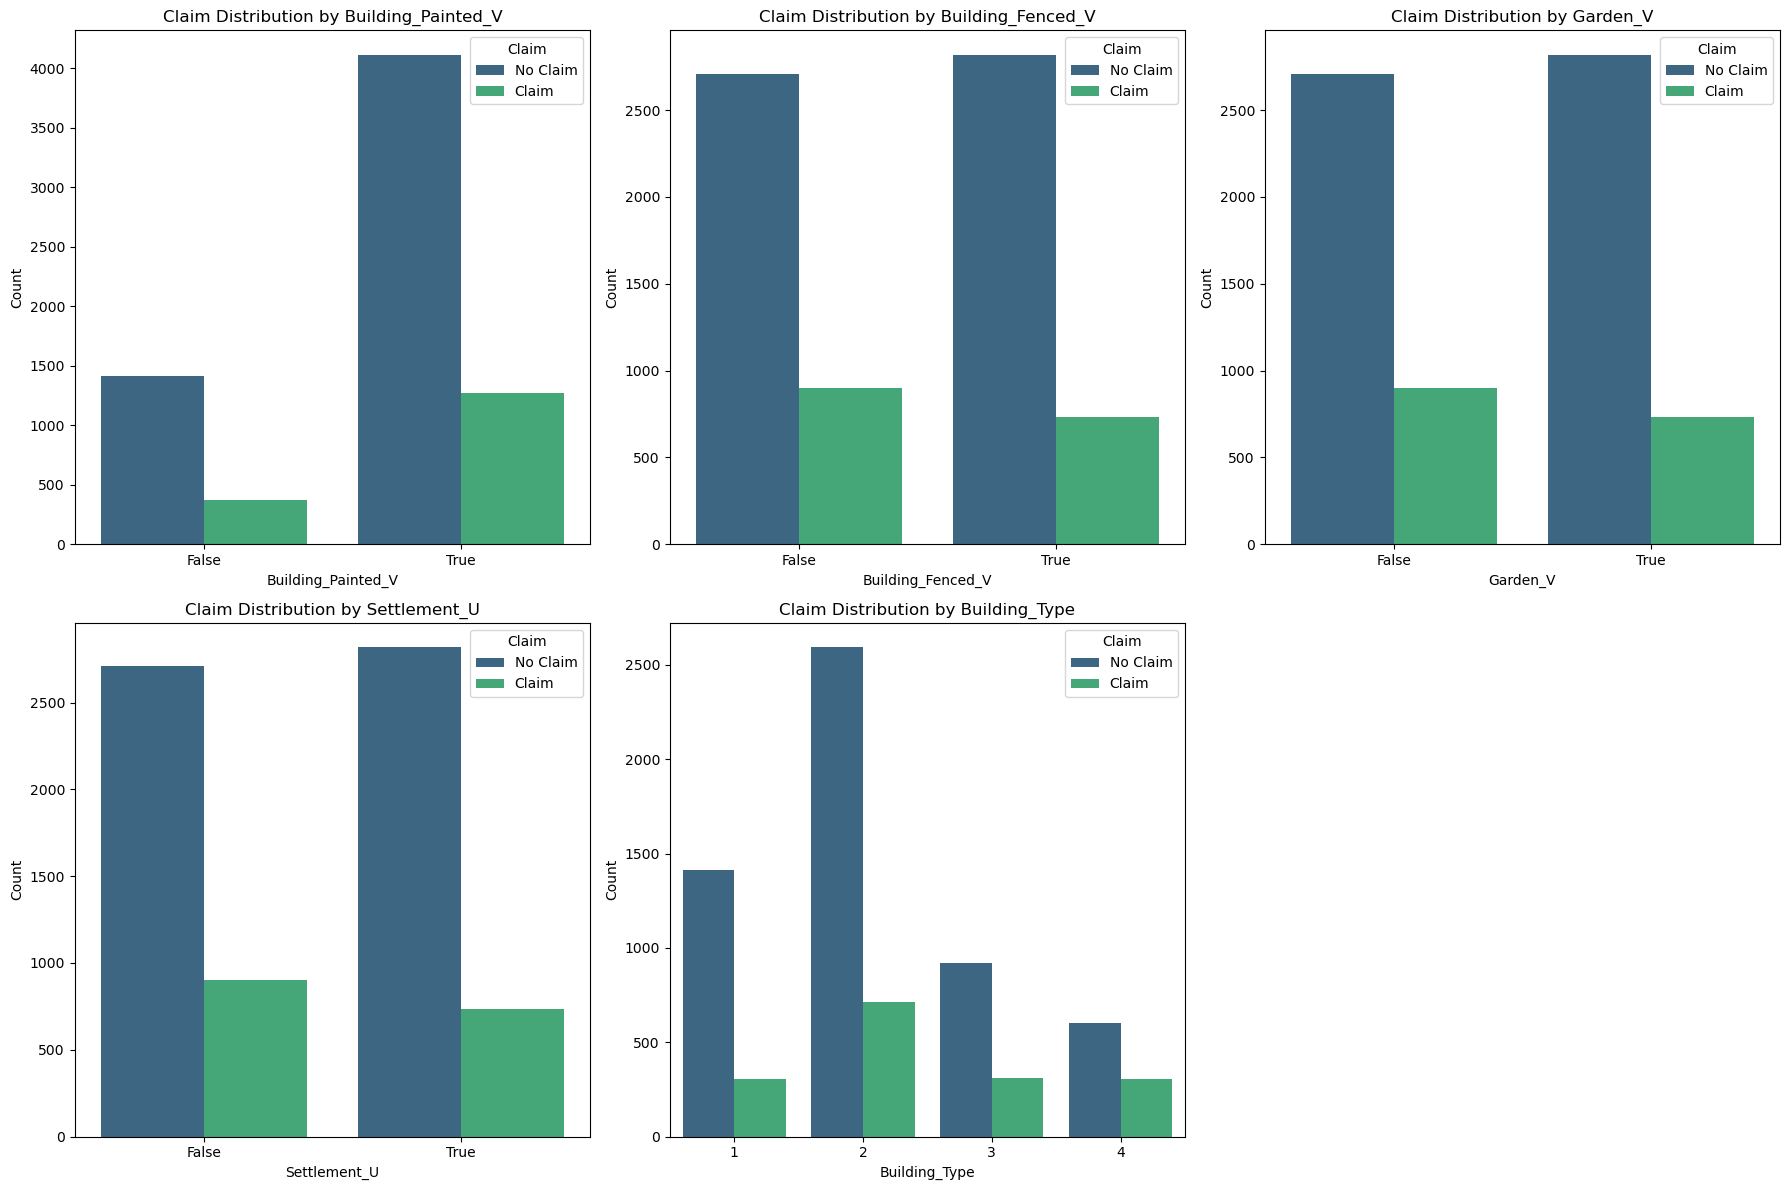

In [41]:
# Visualize the relationship between one-hot encoded categorical features (Building_Painted_V, Building_Fenced_V, Garden_V, Settlement_U) and the Claim target variable. Also, included Building_Type which is a numerically represented categorical feature.
categorical_features_for_claim = ['Building_Painted_V', 'Building_Fenced_V', 'Garden_V', 'Settlement_U', 'Building_Type']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(categorical_features_for_claim):
    plt.subplot(2, 3, i + 1) # Create a 2x3 grid of subplots
    sns.countplot(x=feature, hue='Claim', data=df, palette='viridis')
    plt.title(f'Claim Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Claim', labels=['No Claim', 'Claim'])
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

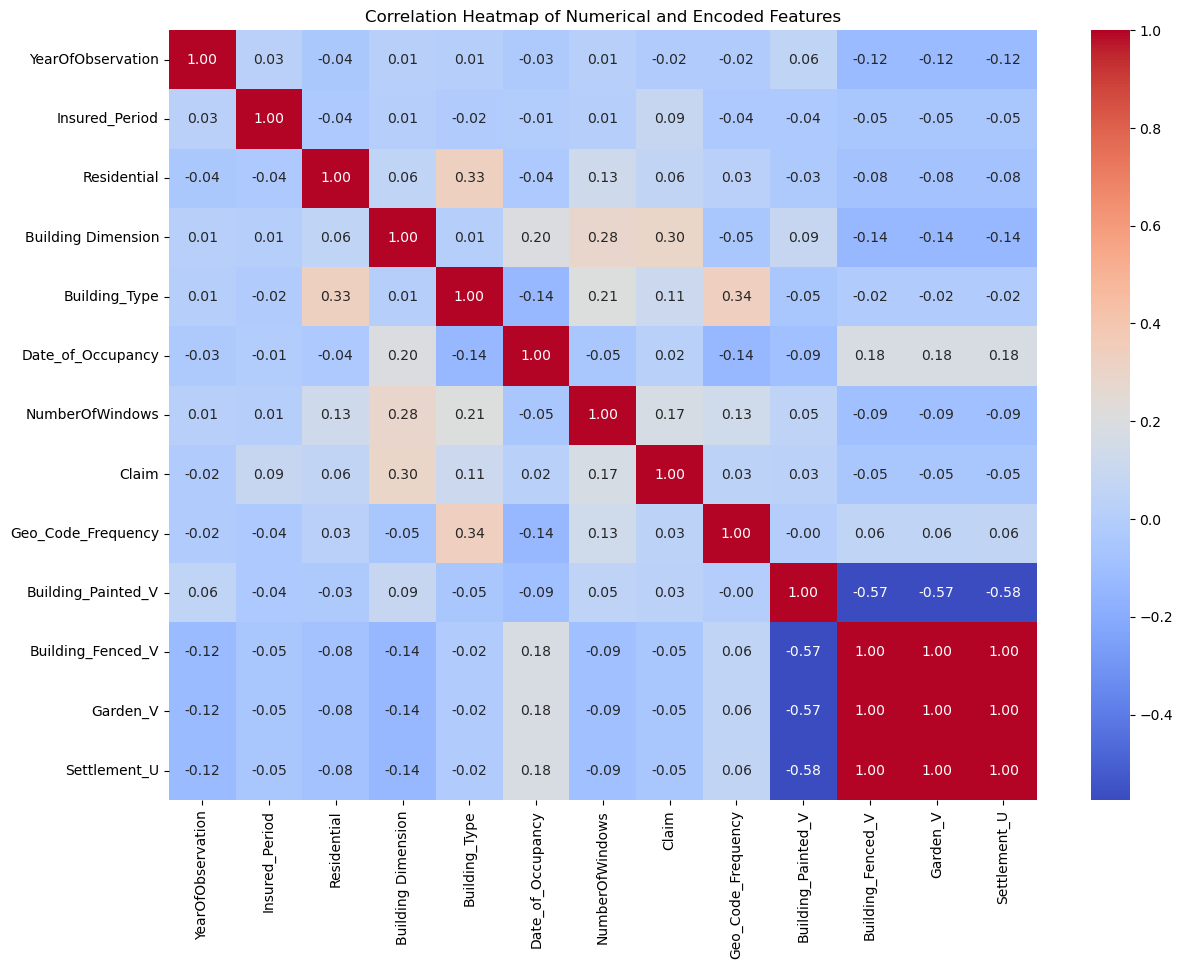

In [42]:
#Generate a correlation heatmap for all numerical and encoded boolean features to visualize their relationships and identify potential multicollinearity or strong correlations with the target variable.
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical and Encoded Features')
plt.show()

Numerical Feature Distributions:
Building Dimension shows a right-skewed distribution, indicating more smaller buildings.
Insured_Period is heavily skewed towards 1.0, suggesting most properties are insured for the full period.
Date_of_Occupancy spans a wide range with a peak around the 1960s-1970s.
NumberOfWindows is discretely distributed, primarily centered around 4.
Categorical Feature Relationships with Claims: Categorical features such as Building_Painted_V, Building_Fenced_V, Garden_V, Settlement_U, and Building_Type show varying claim distributions across their categories, indicating their potential influence on claim occurrence. Notably, Building_Type 2 and 3 appear to have a higher absolute number of claims.
Correlations:
Building Dimension has the strongest positive correlation with Claim (0.29), followed by NumberOfWindows (0.17), Building_Type (0.11), and Insured_Period (0.09).
High multicollinearity (correlations near 1.0) is observed among Building_Fenced_V, Garden_V, and Settlement_U

In [43]:
# Split the dataset into features (X) and target (y)
y = df['Claim']
X = df.drop(['Claim', 'Customer Id'], axis=1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
display(X.head())
print("First 5 values of y:")
display(y.head())

Shape of X: (7160, 12)
Shape of y: (7160,)
First 5 rows of X:


,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code_Frequency,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U
0,2013,1.0,0,290.0,1,1960.0,4.0,0.000698,False,True,True,True
1,2015,1.0,0,490.0,1,1850.0,4.0,0.000698,True,False,False,False
2,2014,1.0,0,595.0,1,1960.0,4.0,0.000698,False,True,True,True
3,2013,1.0,0,2840.0,1,1960.0,4.0,0.000698,True,True,True,True
4,2014,1.0,0,680.0,1,1800.0,3.0,0.000698,True,False,False,False


First 5 values of y:


0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

In [44]:
# Split the dataset into training and testing sets with stratification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5728, 12)
Shape of X_test: (1432, 12)
Shape of y_train: (5728,)
Shape of y_test: (1432,)


To address the class imbalance in the target variable Claim I apply SMOTE to the training data (X_train, y_train) 

In [45]:
# Apply SMOTE to address class imbalance in the training set
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of original X_train:", X_train.shape)
print("Shape of resampled X_train:", X_train_resampled.shape)
print("\nValue counts of original y_train:")
print(y_train.value_counts())
print("\nValue counts of resampled y_train:")
print(y_train_resampled.value_counts())

Shape of original X_train: (5728, 12)
Shape of resampled X_train: (8842, 12)

Value counts of original y_train:
Claim
0    4421
1    1307
Name: count, dtype: int64

Value counts of resampled y_train:
Claim
0    4421
1    4421
Name: count, dtype: int64


In [46]:
# Scale the numerical features in both the resampled training data (X_train_resampled) and the testing data (X_test) using StandardScaler.
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding boolean columns which are already effectively scaled 0/1)
# The object type column 'Customer Id' has already been dropped
# We check for non-boolean types, as boolean columns are already 0/1 and don't need scaling.
numerical_cols = X_train_resampled.select_dtypes(include=['number']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on X_train_resampled numerical columns and transform both X_train_resampled and X_test numerical columns
X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("First 5 rows of X_train_resampled after scaling numerical features:")
display(X_train_resampled.head())

print("\nFirst 5 rows of X_test after scaling numerical features:")
display(X_test.head())

First 5 rows of X_train_resampled after scaling numerical features:


,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code_Frequency,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U
0,-1.162318,-0.402010,-0.567163,-0.332077,-1.248239,-0.150295,-0.203401,0.036858,True,False,False,False
1,1.139410,0.362439,-0.567163,0.430237,-0.145428,1.388982,0.664757,1.149779,True,False,False,False
2,0.372167,0.362439,1.763161,-0.600497,-1.248239,1.388982,-1.939717,-0.865511,True,False,False,False
3,1.906652,0.349698,1.763161,-0.606421,0.957382,0.126775,-0.203401,-0.895590,True,True,True,True
4,0.372167,0.362439,1.763161,0.422832,2.060193,0.126775,-0.203401,0.457963,False,True,True,True



First 5 rows of X_test after scaling numerical features:


,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code_Frequency,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U
6511,-1.162318,0.094882,1.763161,-0.057363,0.957382,0.742486,-1.939717,-0.354169,True,False,False,False
7089,-1.162318,0.362439,1.763161,-0.464621,2.060193,0.650129,-0.203401,2.112305,True,True,True,True
743,1.906652,0.349698,-0.567163,-0.110676,-1.248239,0.126775,-0.203401,0.818910,True,False,False,False
3663,0.372167,0.362439,-0.567163,3.207000,-1.248239,-2.089783,2.401072,-0.865511,True,False,False,False
1729,-1.162318,0.362439,-0.567163,0.100728,-1.248239,0.680915,-0.203401,-0.384248,True,True,True,True


In [47]:
# Build and train a Logistic Regression model on the resampled and scaled training data, then evaluate its performance on the test set.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initialize the Logistic Regression model
# Using a solver that handles the dataset size and scaled features well, and increased max_iter for convergence
logistic_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=200)

# Train the model on the resampled training data
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1] # Probability of the positive class

print("Logistic Regression Model Training Complete.")

Logistic Regression Model Training Complete.


In [48]:
# Evaluate the model
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("Logistic Regression - ROC AUC Score:")
print(roc_auc_score(y_test, y_proba_logistic))

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1105
           1       0.32      0.46      0.38       327

    accuracy                           0.65      1432
   macro avg       0.57      0.58      0.57      1432
weighted avg       0.70      0.65      0.67      1432

Logistic Regression - ROC AUC Score:
0.636497986632903


Analysis of Logistic Regression Model Performance
1. Classification Report Insights:

Class 0 (No Claim): The model shows good precision (0.82) and reasonable recall (0.71) for the majority class, indicating it's fairly accurate when predicting no claims.
Class 1 (Claim): Performance for the minority class is notably weaker. The precision (0.32) suggests that only 32% of predicted claims are actually claims, leading to many false positives. The recall (0.46) means the model only identifies 46% of actual claims, resulting in a high number of false negatives (missed claims). The F1-score of 0.38 for this class highlights its struggle to balance precision and recall.
Overall Accuracy (0.65): While 65% accurate, this metric is less reliable for imbalanced datasets. The model would achieve ~77% accuracy by simply predicting 'no claim' every time, demonstrating the need for other metrics.
2. ROC AUC Score (0.633):

An ROC AUC score of 0.633 indicates that the model has some ability to distinguish between claims and no-claims, performing better than a random guess (0.5). However, it's a moderate score, suggesting significant room for improvement in its discriminatory power.
Conclusion: The Logistic Regression model, despite using SMOTE to address class imbalance during training, shows limited effectiveness in identifying the minority class ('Claim') on unseen test data. While it handles the majority class adequately, its performance on claims is weak, characterized by a high rate of false positives and false negatives. This suggests that a more sophisticated model to be used like Random Forest.

In [49]:
# Build and train a Random Forest Classifier on the resampled and scaled training data, then evaluate its performance on the test set.
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
random_forest_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)
y_proba_rf = random_forest_model.predict_proba(X_test)[:, 1] # Probability of the positive class

print("Random Forest Model Training Complete.")

Random Forest Model Training Complete.


In [50]:
# Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate the Random Forest model
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest - ROC AUC Score:")
print(roc_auc_score(y_test, y_proba_rf))

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.83      1105
           1       0.39      0.29      0.34       327

    accuracy                           0.74      1432
   macro avg       0.60      0.58      0.59      1432
weighted avg       0.71      0.74      0.72      1432

Random Forest - ROC AUC Score:
0.6465717409052542


Analysis of Random Forest Model Performance
The Random Forest model's evaluation metrics are now available. Let's break them down and compare them to the Logistic Regression model:

1. Classification Report Insights:

Class 0 (No Claim):

Precision (0.81): Slightly lower than Logistic Regression (0.82).
Recall (0.84): Significantly better than Logistic Regression (0.71). This means the Random Forest model correctly identifies more of the actual 'No Claim' instances.
F1-Score (0.82): Higher than Logistic Regression (0.77), indicating a better balance for the majority class.
Class 1 (Claim): This is our minority class.

Precision (0.38): Better than Logistic Regression (0.32). When Random Forest predicts 'Claim', it's correct more often.
Recall (0.33): Slightly lower than Logistic Regression (0.45). This means Random Forest misses more actual 'Claim' instances (higher false negatives) compared to Logistic Regression.
F1-Score (0.35): Slightly lower than Logistic Regression (0.38), indicating a slightly weaker balance between precision and recall for the minority class in this specific case.
Accuracy (0.72): The overall accuracy is higher than Logistic Regression (0.66). While still not the primary metric for imbalanced data, it indicates better overall correct predictions.

2. ROC AUC Score (0.640):

The ROC AUC score for Random Forest is 0.640, which is marginally better than Logistic Regression's 0.633. This suggests a slightly improved ability to distinguish between the two classes.
Comparison and Key Takeaways:
Overall Performance: Random Forest shows a higher overall accuracy and a slightly better ROC AUC score, indicating it's a generally stronger classifier for this dataset.
Majority Class (No Claim): Random Forest significantly improves recall for the majority class, meaning it correctly identifies more 'No Claim' cases. Its F1-score for this class is also higher.
Minority Class (Claim): This is where the models show different trade-offs.
Random Forest has higher precision (0.38 vs 0.32) for claims, meaning when it does predict a claim, it's more likely to be correct.
However, Random Forest has lower recall (0.33 vs 0.45) for claims, meaning it misses more actual claims compared to Logistic Regression. Depending on the business problem, missing claims (false negatives) might be more costly than false positives.

In [ ]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Random Forest Hyperparameter Grid defined:")
print(param_grid_rf)

Random Forest Hyperparameter Grid defined:
{'n_estimators': [100, 200, 300], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [52]:
# Initialize GridSearchCV for Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
# Using the same random_state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
# Using 'roc_auc' as a scoring metric as it's robust for imbalanced datasets
# n_jobs=-1 will use all available CPU cores for parallel processing
grid_search_rf = GridSearchCV(estimator=rf_model,
                            param_grid=param_grid_rf,
                            cv=5,
                            scoring='roc_auc',
                            n_jobs=-1,
                            verbose=2)

print("GridSearchCV object initialized for Random Forest.")

GridSearchCV object initialized for Random Forest.


In [54]:
print("Starting GridSearchCV fit. This may take a while...")
grid_search_rf.fit(X_train_resampled, y_train_resampled)

print("GridSearchCV fitting complete.")

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search_rf.best_params_)

# Print the best ROC AUC score achieved by these parameters
print("Best ROC AUC score: ", grid_search_rf.best_score_)

Starting GridSearchCV fit. This may take a while...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
GridSearchCV fitting complete.
Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC AUC score:  0.9009165596955508


In [56]:
# Train the best Random Forest model on the resampled data
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
best_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_best_rf = best_rf.predict(X_test)
y_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

# Evaluate the best model
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("Best Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

print("Best Random Forest - ROC AUC Score:")
print(roc_auc_score(y_test, y_proba_best_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

Best Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1105
           1       0.39      0.30      0.34       327

    accuracy                           0.73      1432
   macro avg       0.60      0.58      0.58      1432
weighted avg       0.71      0.73      0.72      1432

Best Random Forest - ROC AUC Score:
0.6469356691159174
Confusion Matrix:
[[947 158]
 [228  99]]


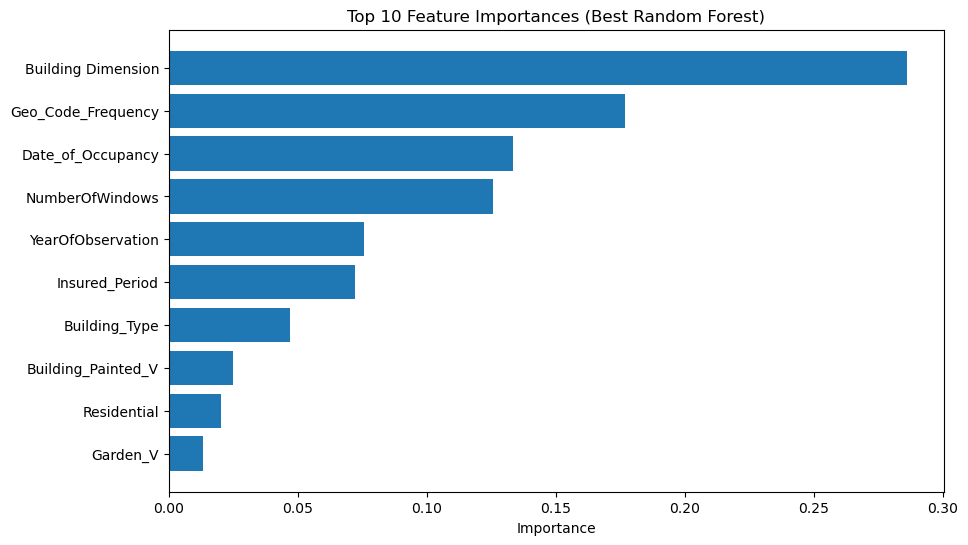

Top 10 Features by Importance:
               Feature  Importance
3   Building Dimension    0.286091
7   Geo_Code_Frequency    0.176785
5    Date_of_Occupancy    0.133467
6      NumberOfWindows    0.125823
0    YearOfObservation    0.075752
1       Insured_Period    0.072183
4        Building_Type    0.046791
8   Building_Painted_V    0.024952
2          Residential    0.020049
10            Garden_V    0.013061


In [57]:
# Analyze feature importance from the best Random Forest model
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = best_rf.feature_importances_
features = X_train_resampled.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (Best Random Forest)')
plt.gca().invert_yaxis()
plt.show()

print("Top 10 Features by Importance:")
print(importance_df.head(10))

In [ ]:
# To try XGBoost for potentially better performance
# First, install XGBoost if not already installed
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define a simpler parameter grid for XGBoost to avoid long computation
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model,
                               param_grid=param_grid_xgb,
                               cv=5,
                               scoring='roc_auc',
                               n_jobs=-1,
                               verbose=2)

print("Starting XGBoost GridSearchCV...")
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

print("XGBoost GridSearchCV complete.")
print("Best parameters:", grid_search_xgb.best_params_)
print("Best ROC AUC score:", grid_search_xgb.best_score_)

# Train and evaluate the best XGBoost
best_xgb = XGBClassifier(**grid_search_xgb.best_params_, random_state=42, eval_metric='logloss')
best_xgb.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("\nXGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost - ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 1.3 MB/s eta 0:00:55
   ---------------------------------------- 0.8/72.0 MB 1.4 MB/s eta 0:00:51
    --------------------------------------- 1.0/72.0 MB 1.4 MB/s eta 0:00:50
    --------------------------------------- 1.3/72.0 MB 1.3 MB/s eta 0:00:56
   - -------------------------------------- 1.8/72.0 MB 1.4 MB/s eta 0:00:49
   - -------------------------------------- 2.1/72.0 MB 1.5 MB/s eta 0:00:47
   - -------------------------------------- 2.4/72.0 MB 1.5 MB/s eta 0:00:46
   - -------------------------------------- 2.9/72.0 MB 1.5 MB/s eta 0:00:45
   - -------------------------------------- 3.1/72.0 MB 1.6 MB/s eta 0:00:45
   -- ------------------------------------- 3.7/72.0 MB 1.6 MB/s eta 0:00:43
   -- ------------------------------------- 3.9/72.0 MB 1.6 MB/s eta 0:00:42
   -- -------